In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%run utils.ipynb

In [8]:
# carrega tabela de erbs (não usada no treino, talvez dê algum insight)
erbs = pd.read_csv('database/Bts.csv')
erbs

,grupo,btsId,lat,lon,cch,azimuth,RssiId,Eirp
0,1,BTS_1_1,-8.04342,-34.952000,873,0,rssi_1_1,55.59
1,1,BTS_1_2,-8.04342,-34.952000,872,120,rssi_1_2,55.59
2,1,BTS_1_3,-8.04342,-34.952000,875,240,rssi_1_3,55.59
3,2,BTS_2_1,-8.05289,-34.944672,865,0,rssi_2_1,55.59
4,2,BTS_2_2,-8.05289,-34.944672,874,120,rssi_2_2,55.59
5,2,BTS_2_3,-8.05289,-34.944672,871,240,rssi_2_3,55.59
6,3,BTS_3_1,-8.05532,-34.957900,877,0,rssi_3_1,55.59
7,3,BTS_3_2,-8.05532,-34.957900,881,120,rssi_3_2,55.59
8,3,BTS_3_3,-8.05532,-34.957900,869,240,rssi_3_3,55.59


In [4]:
# carrega o nosso BD
db = pd.read_csv('database/LocTreino_Equipe_4.csv')
db.head()

,lat,lon,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,pontoId
0,-8.05438,-34.95408,-89.044286,-96.667143,-91.320000,-96.106667,-94.480,-90.187143,-94.125000,-85.182,-96.4200,5,4,2,7531
1,-8.05337,-34.94889,-91.970000,-89.548571,-88.555714,-82.520000,-80.445,-89.910000,-88.916667,-91.602,-97.2550,5,2,4,7748
2,-8.05390,-34.95955,-85.255714,-99.635714,-86.551429,-94.520000,-100.225,-88.232857,-78.955000,-92.080,-66.4100,6,7,1,7636
3,-8.05561,-34.95431,-90.025714,-96.200000,-91.204286,-98.160000,-91.935,-92.671429,-78.636667,-68.340,-92.7800,6,5,2,7035
4,-8.05562,-34.95405,-94.525714,-96.200000,-93.830000,-98.216667,-94.670,-94.844286,-79.065000,-68.250,-96.2125,6,5,2,7026


# Mostra o mapa com os pontos e localização das erbs

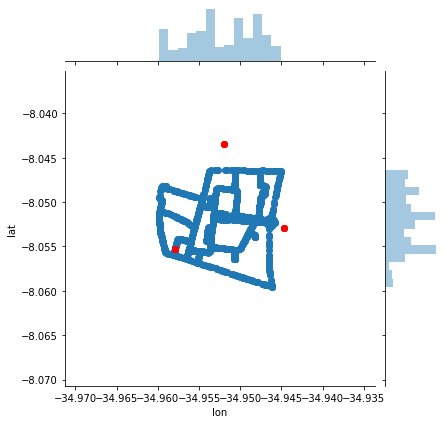

In [10]:
graph = sns.jointplot(x=db.lon, y=db.lat)

graph.x = erbs.lon
graph.y = erbs.lat
graph.plot_joint(plt.scatter, color='red')

In [23]:
dbTeorico = pd.read_csv('result/modelo_teorico_40.csv')
testMap = merge_on_pontoId(dbTeorico, db)
cols = ['pontoId','rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2', 'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3', 'delay_1','delay_2','delay_3']
testMap = testMap.drop(cols, axis=1)
testMap.head()

,lat_x,lon_x,lat_y,lon_y
0,-8.04674,-34.959850,-8.04921,-34.95302
1,-8.04674,-34.959850,-8.04807,-34.94761
2,-8.05955,-34.945508,-8.05361,-34.94907
3,-8.05955,-34.945508,-8.05577,-34.95062
4,-8.05955,-34.945508,-8.05137,-34.94777


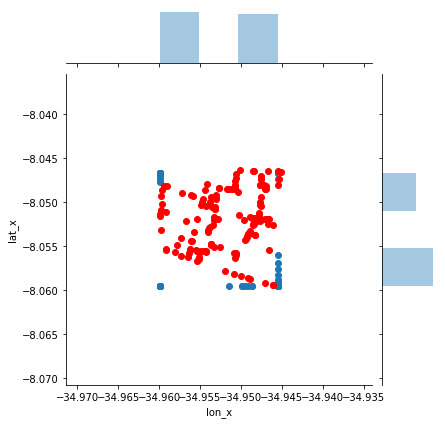

In [25]:
graph = sns.jointplot(x=testMap.lon_x, y=testMap.lat_x)
graph.x = testMap.lon_y
graph.y = testMap.lat_y
graph.plot_joint(plt.scatter, color='red')


# Mostra o fingerprinting

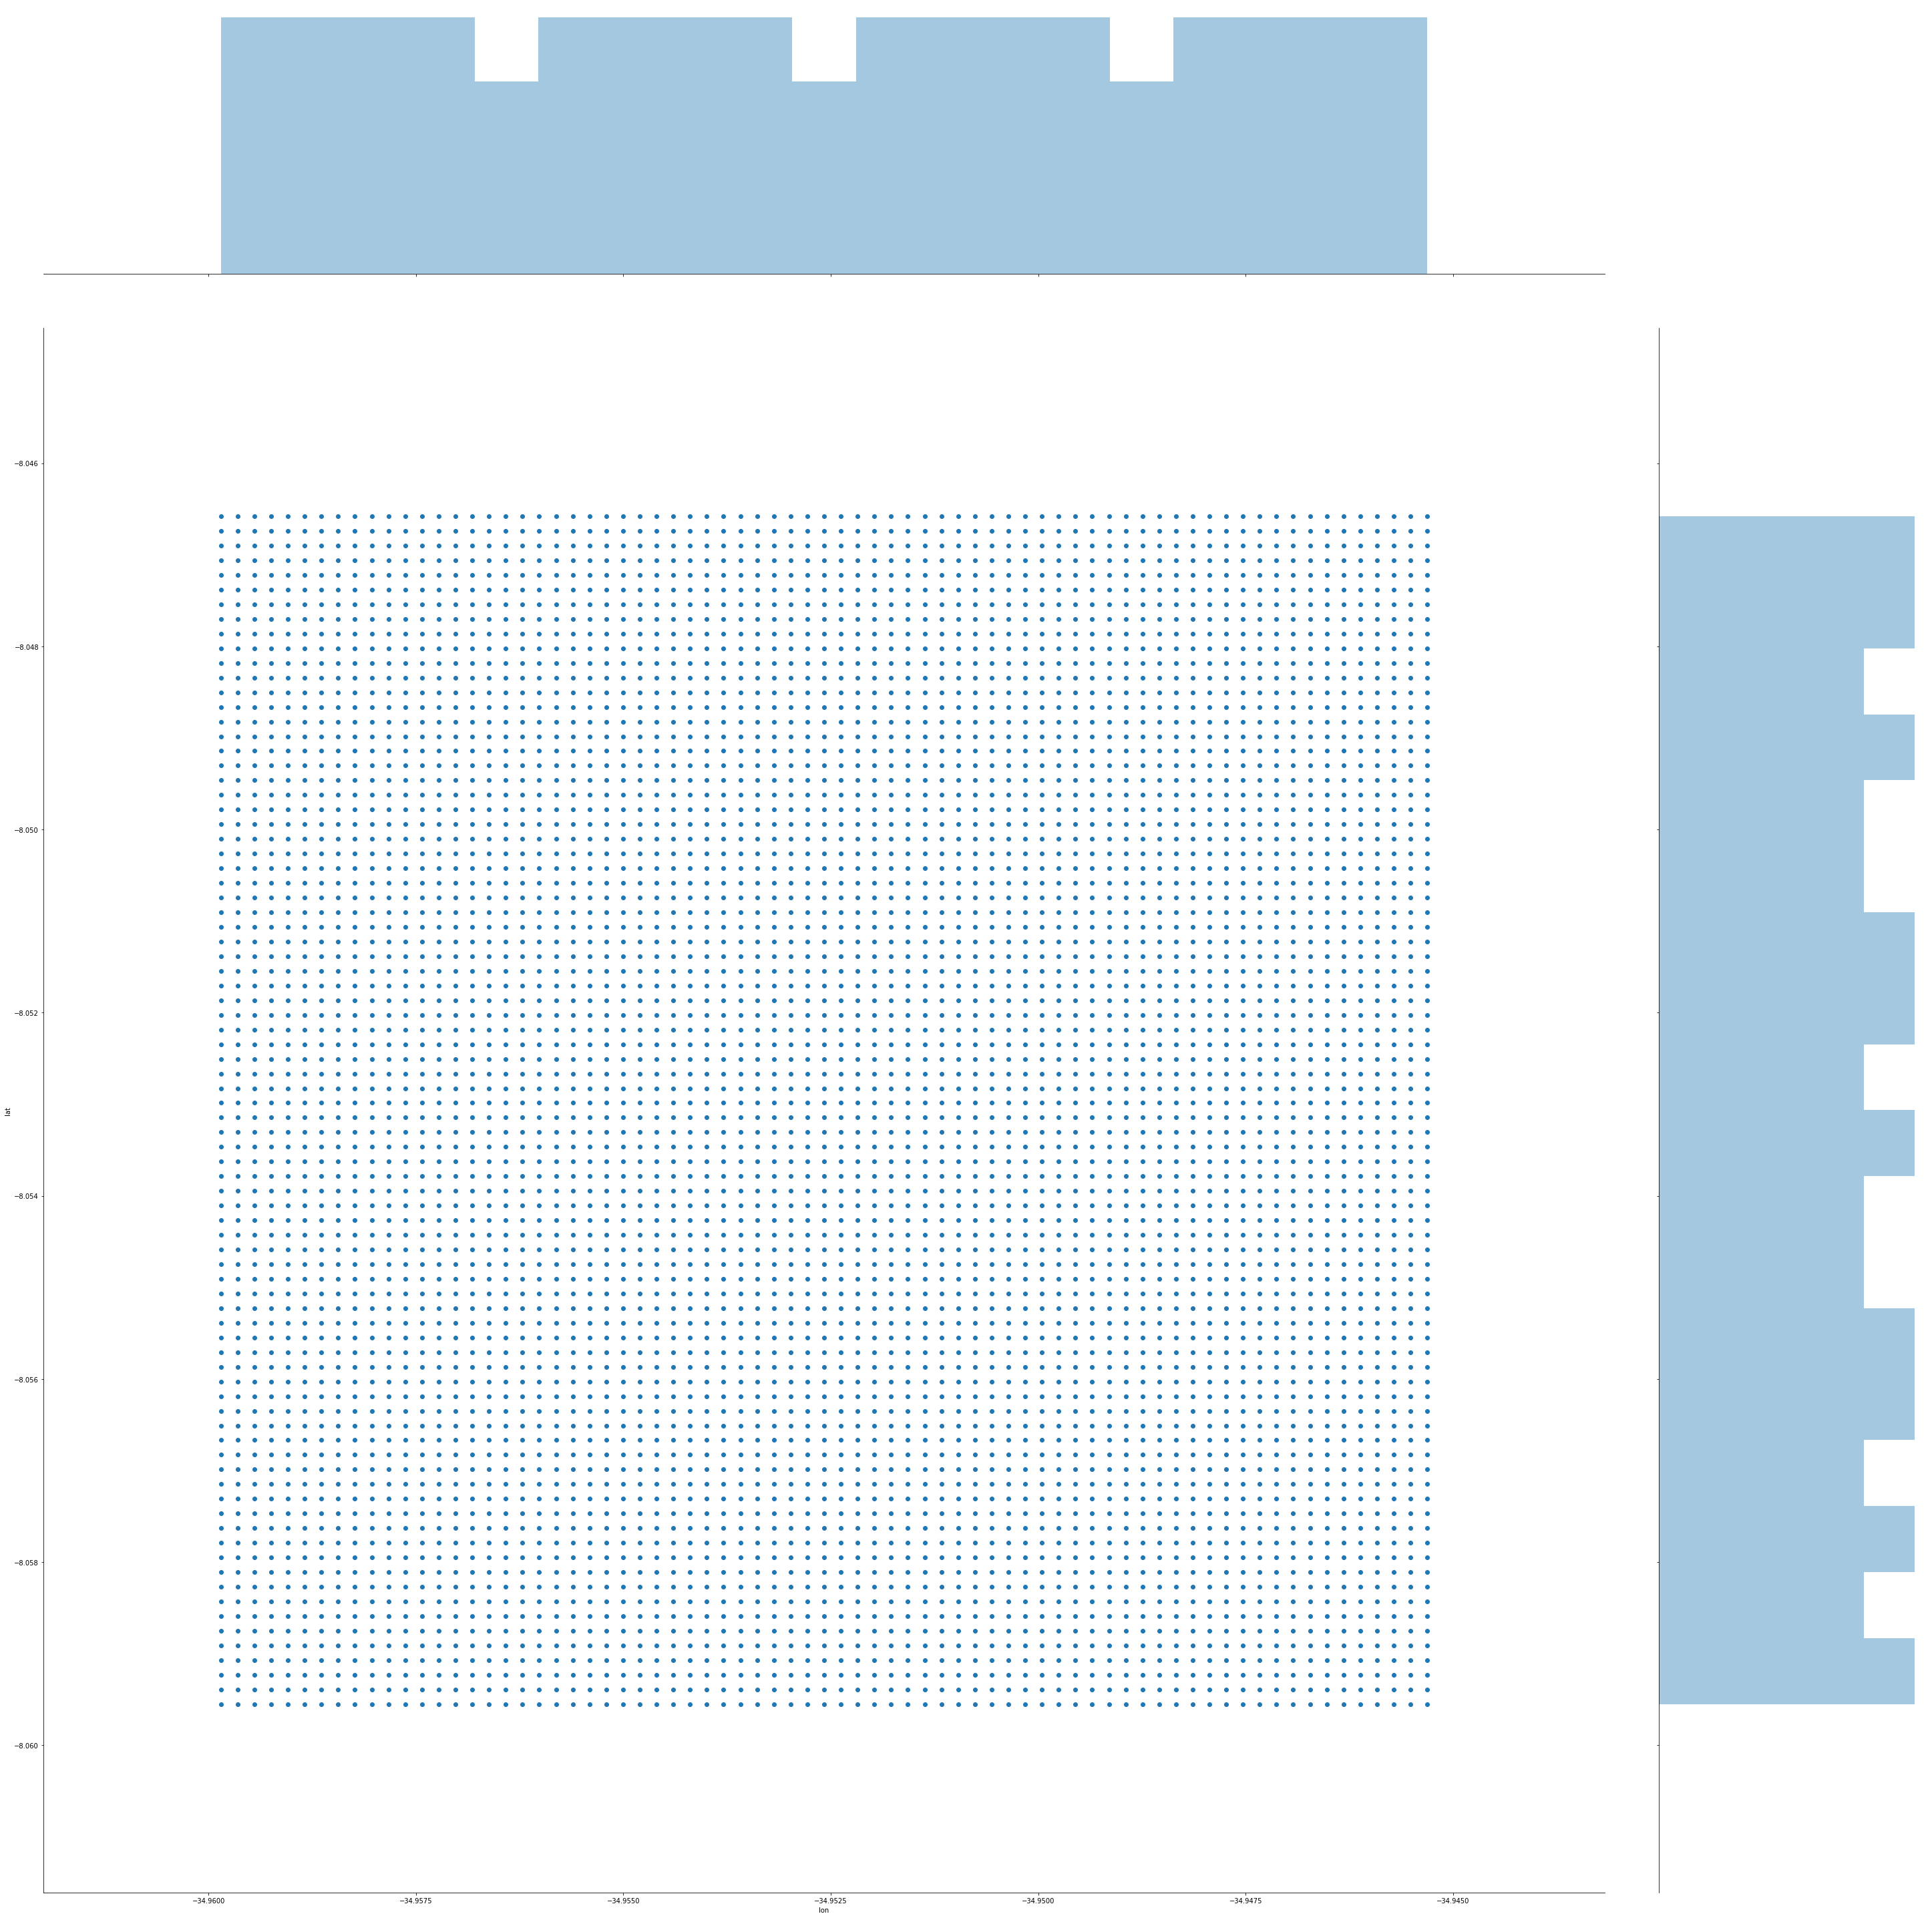

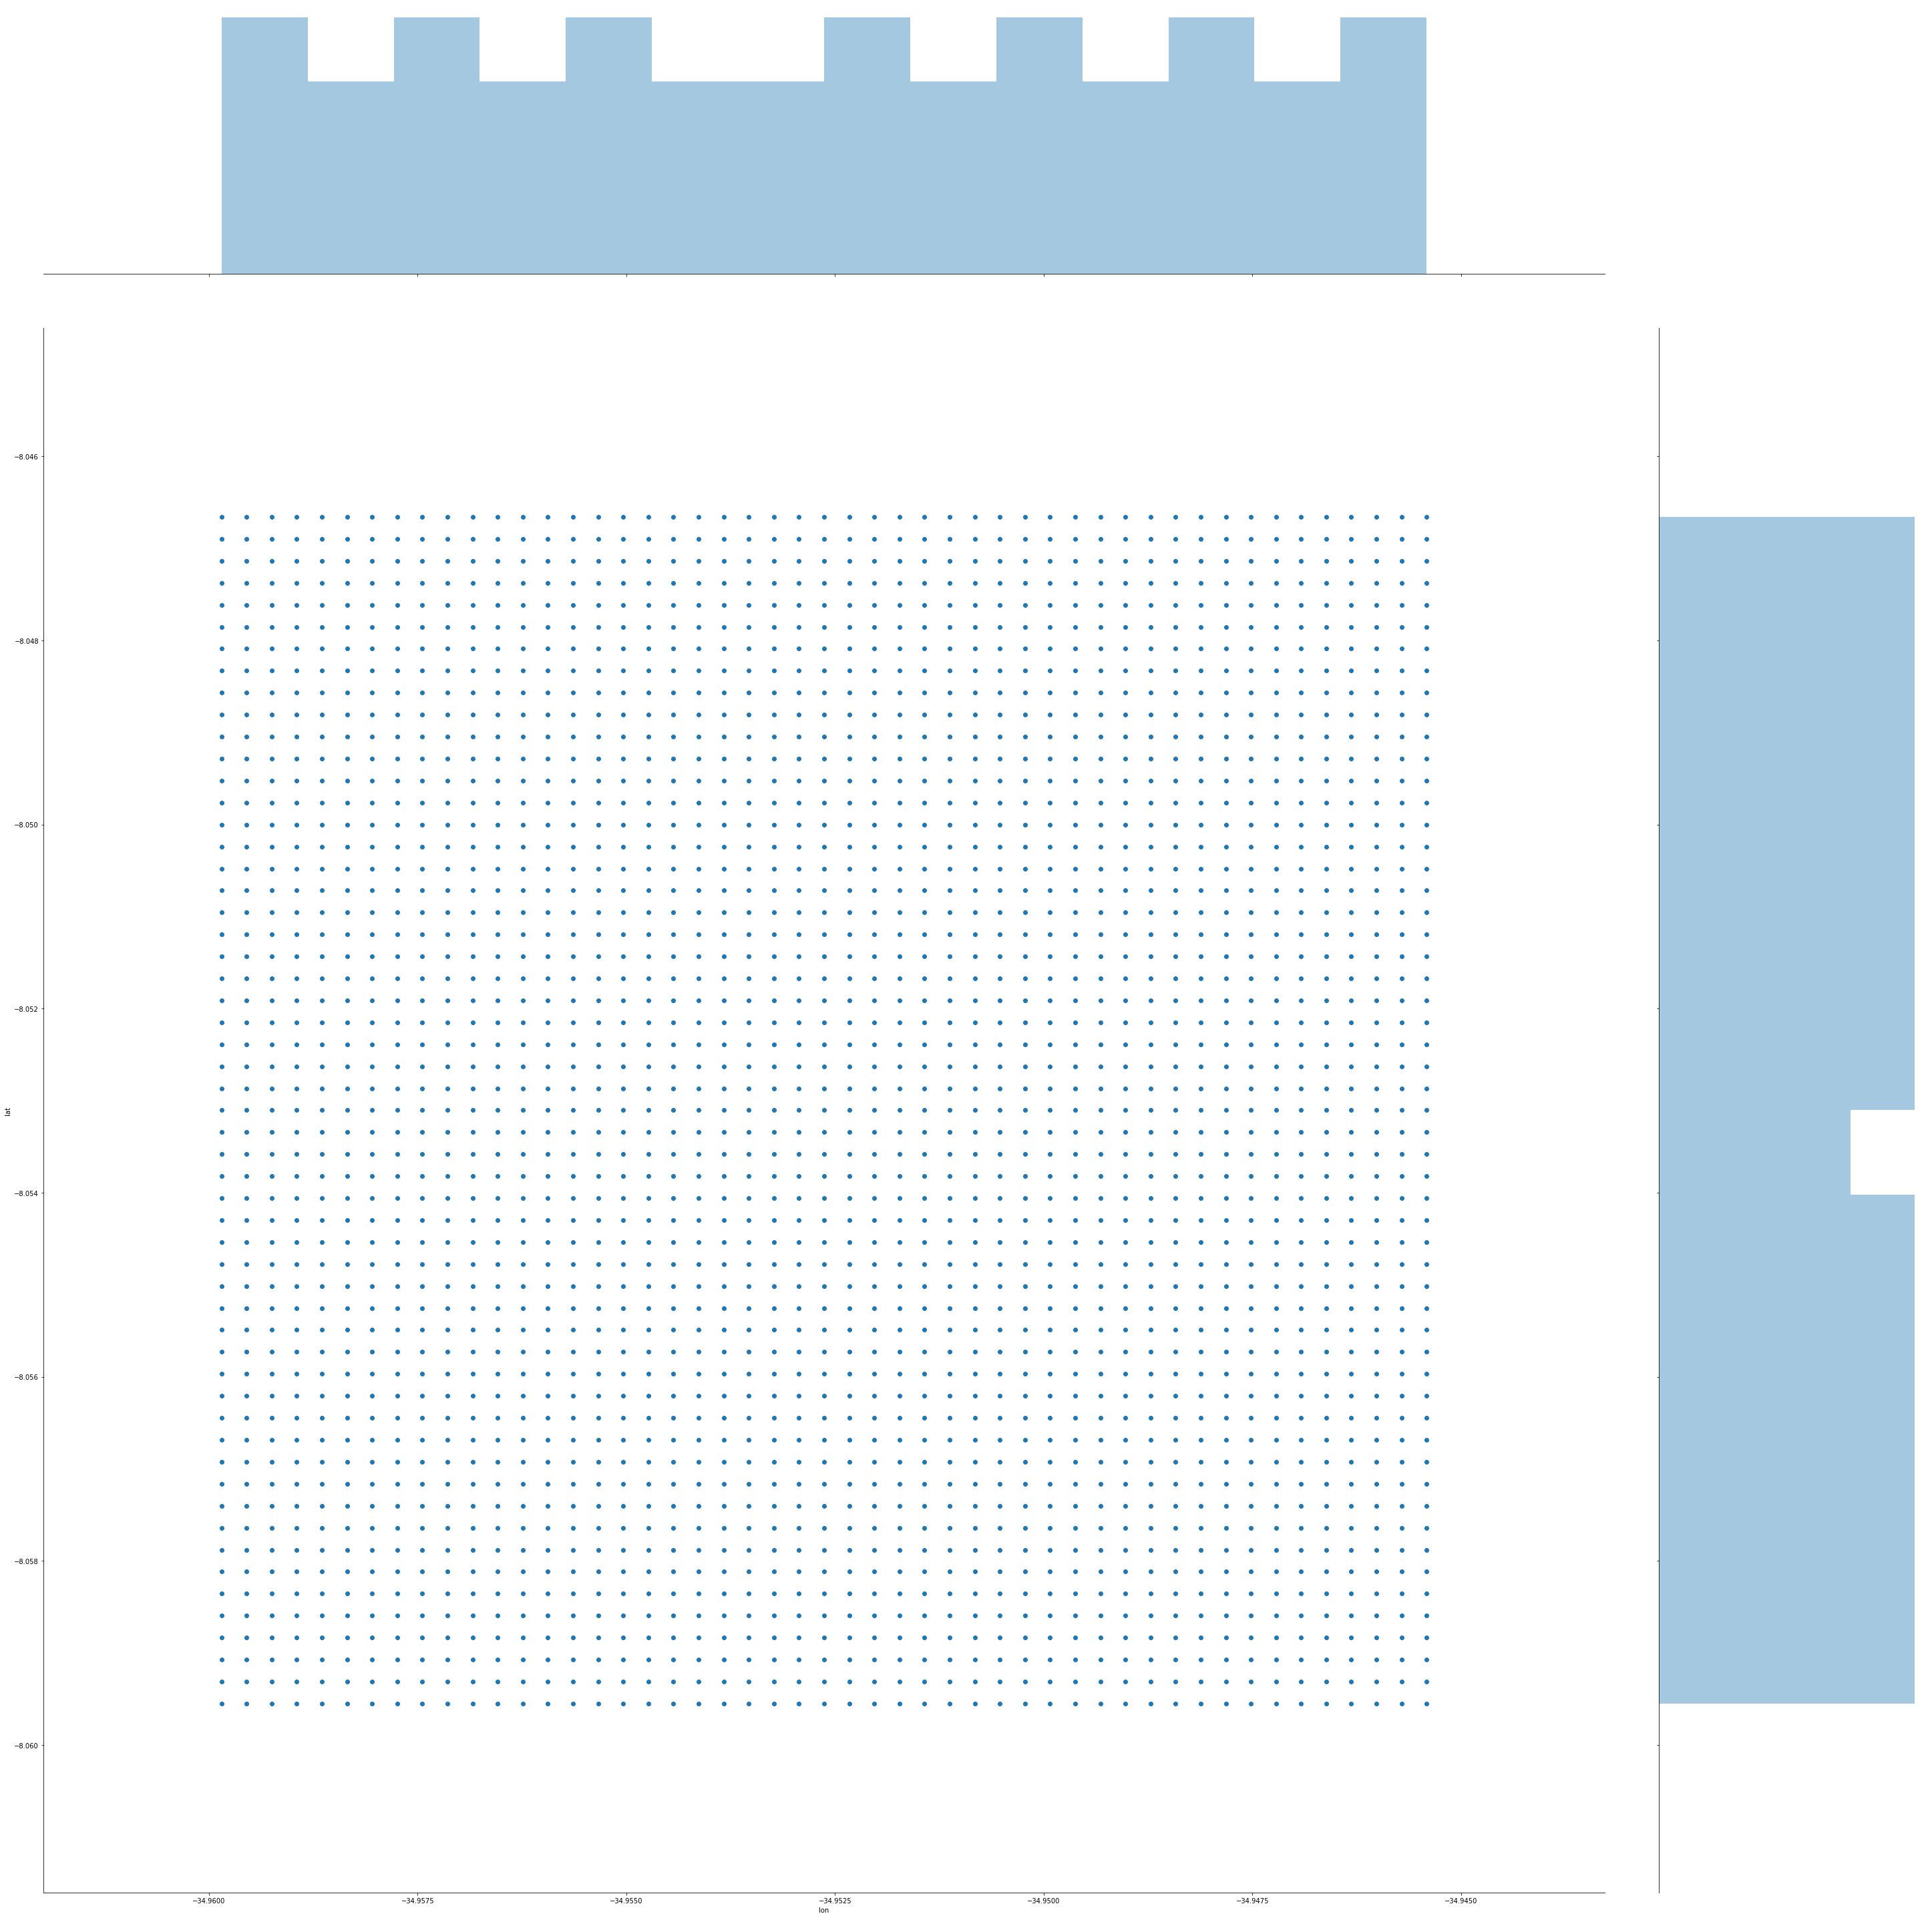

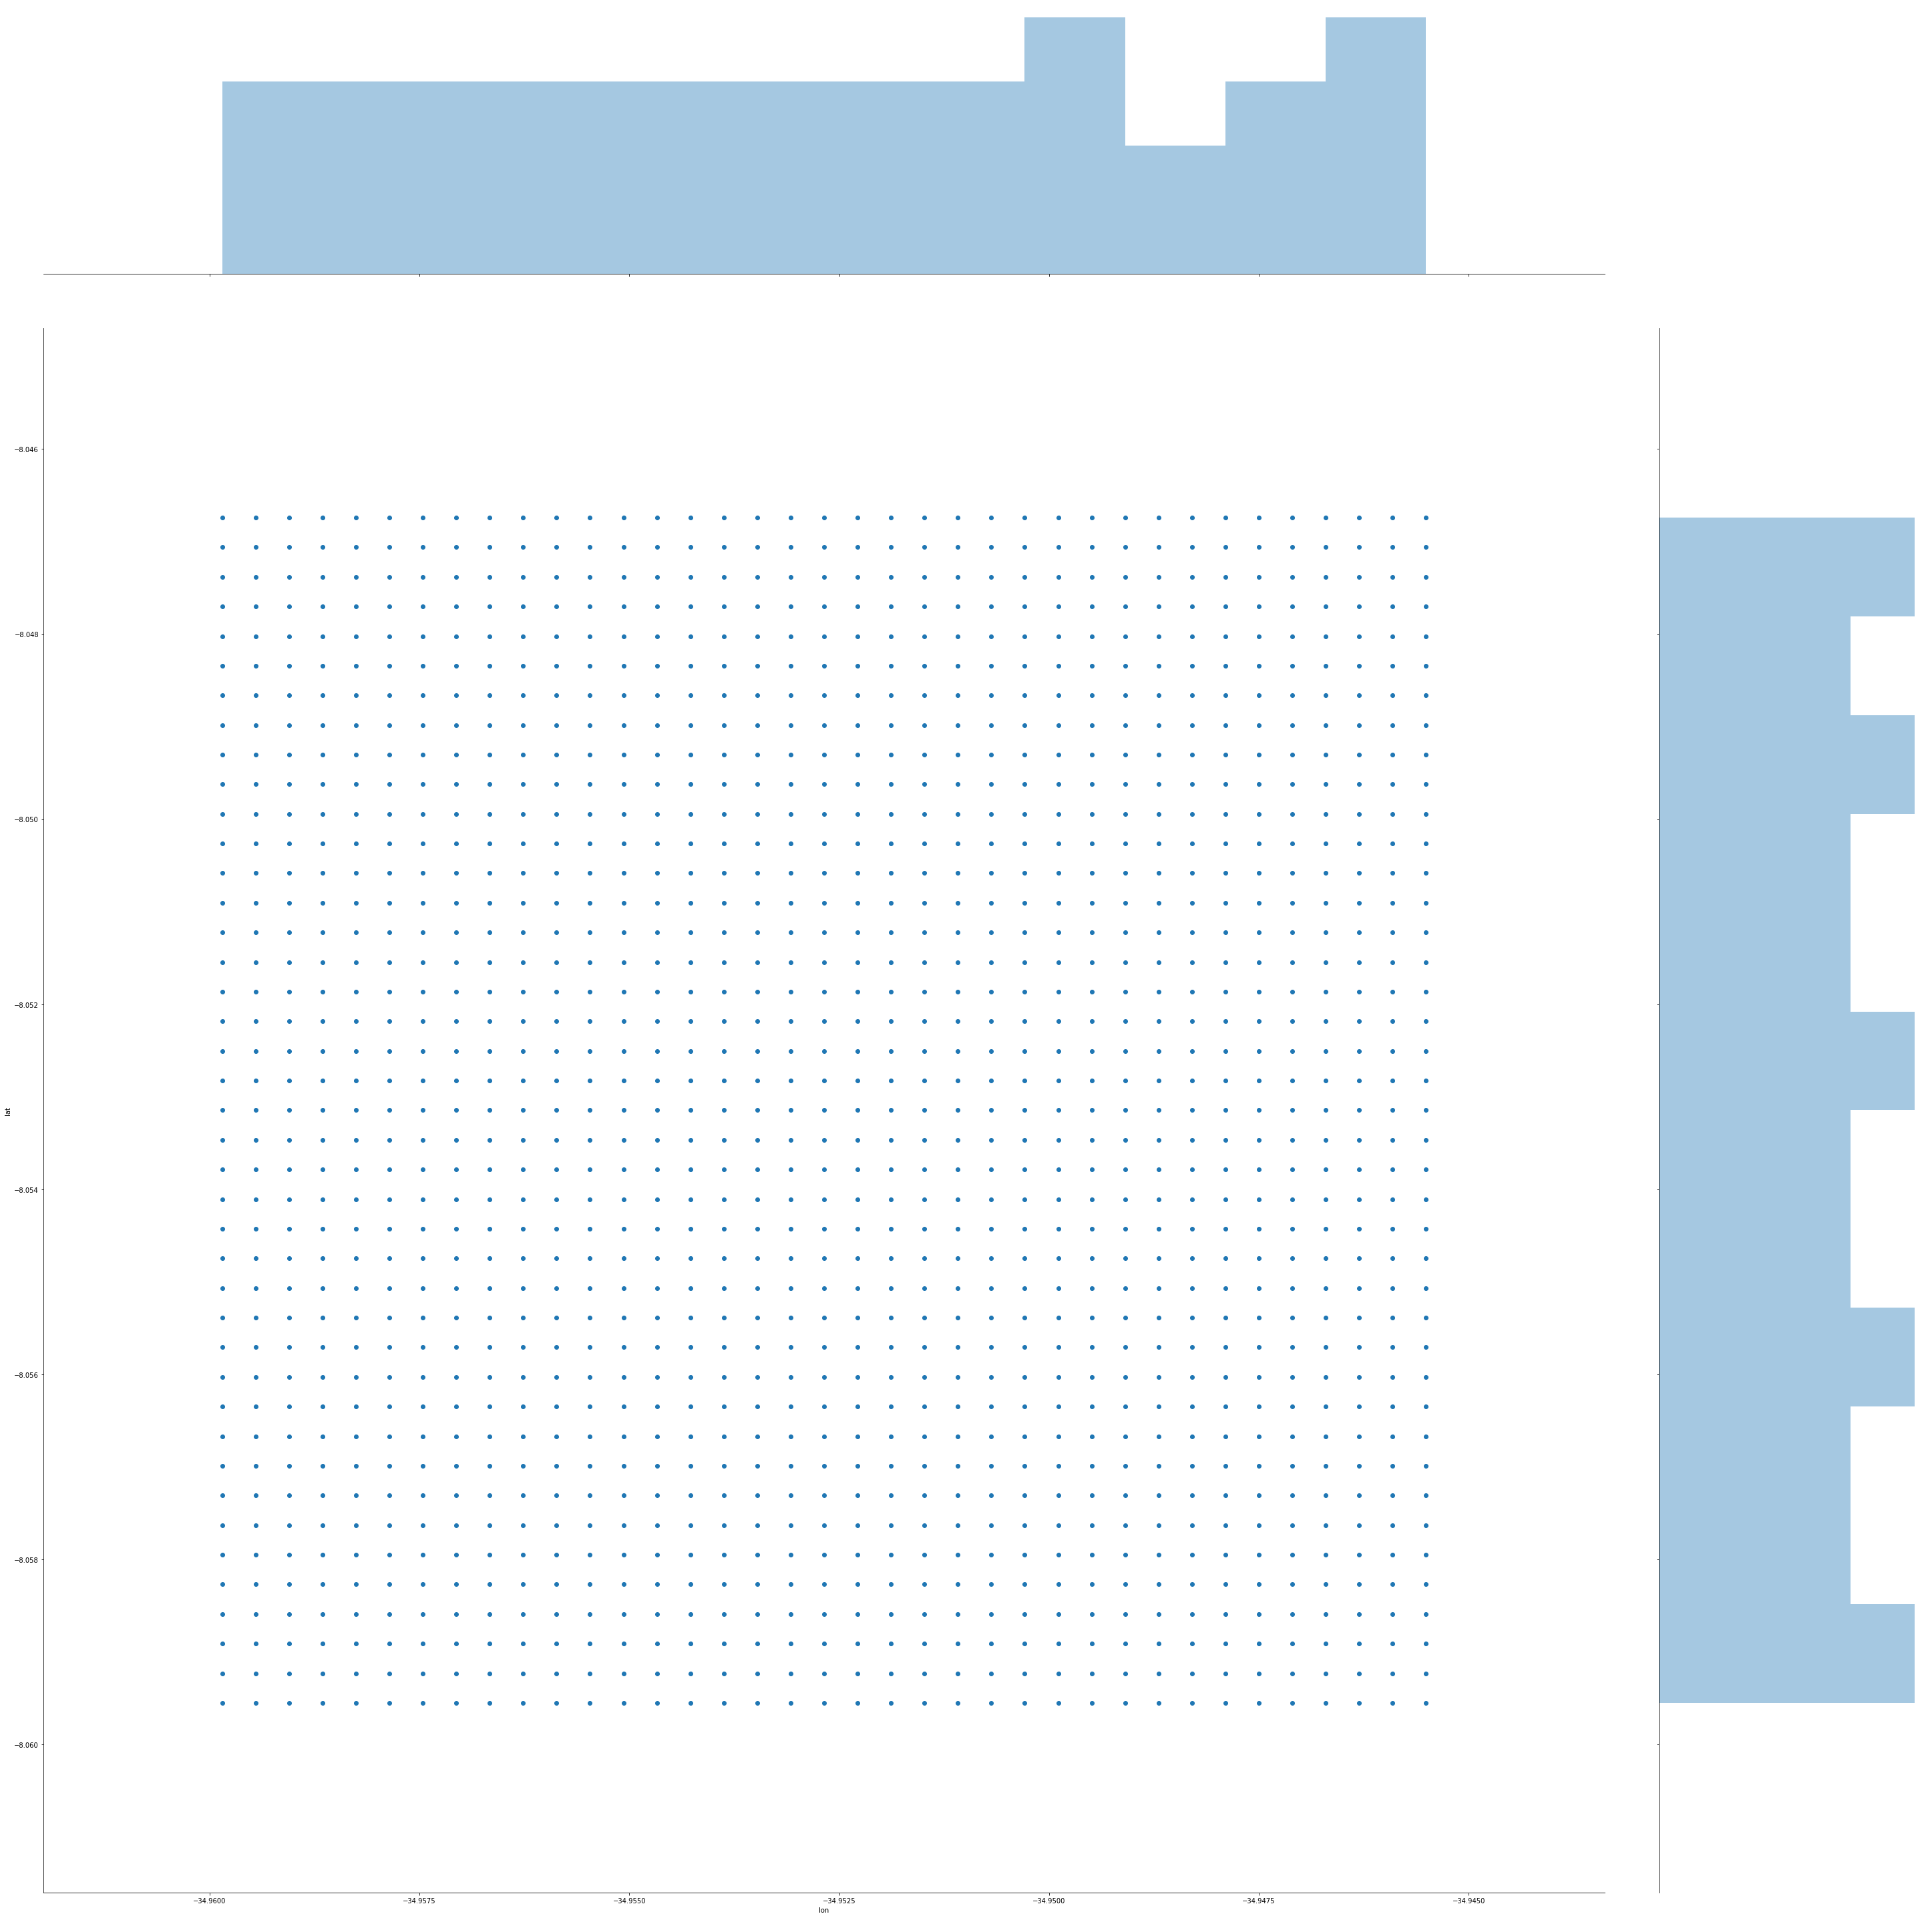

In [11]:
R = [20, 30, 40]
for r in R:
    fingerprint = pd.read_csv('fingerprint/fingerprint_{}.csv'.format(r))
    sns.jointplot(x='lon', y='lat', data=fingerprint, height=40)

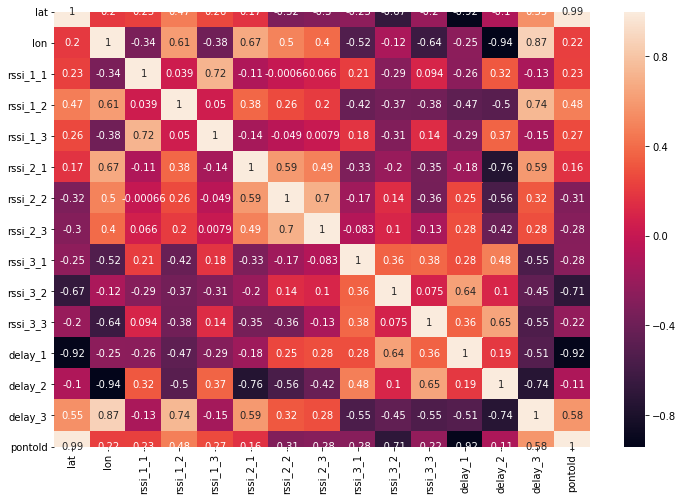

In [56]:
# visualiza heatmap
# TODO: melhorar tamanho da imagem
plt.rc("figure")
sns.heatmap(db.corr(), annot = True)

In [48]:
db = db.to_numpy()
type(db)

numpy.ndarray

In [49]:
db

array([[-8.05438000e+00, -3.49540800e+01, -8.90442857e+01, ...,
         4.00000000e+00,  2.00000000e+00,  7.53100000e+03],
       [-8.05337000e+00, -3.49488900e+01, -9.19700000e+01, ...,
         2.00000000e+00,  4.00000000e+00,  7.74800000e+03],
       [-8.05390000e+00, -3.49595500e+01, -8.52557143e+01, ...,
         7.00000000e+00,  1.00000000e+00,  7.63600000e+03],
       ...,
       [-8.05127000e+00, -3.49532300e+01, -8.98142857e+01, ...,
         4.00000000e+00,  3.00000000e+00,  8.48700000e+03],
       [-8.05338000e+00, -3.49489300e+01, -8.67800000e+01, ...,
         2.00000000e+00,  4.00000000e+00,  7.74500000e+03],
       [-8.05131000e+00, -3.49476800e+01, -9.35428571e+01, ...,
         2.00000000e+00,  5.00000000e+00,  8.47700000e+03]])

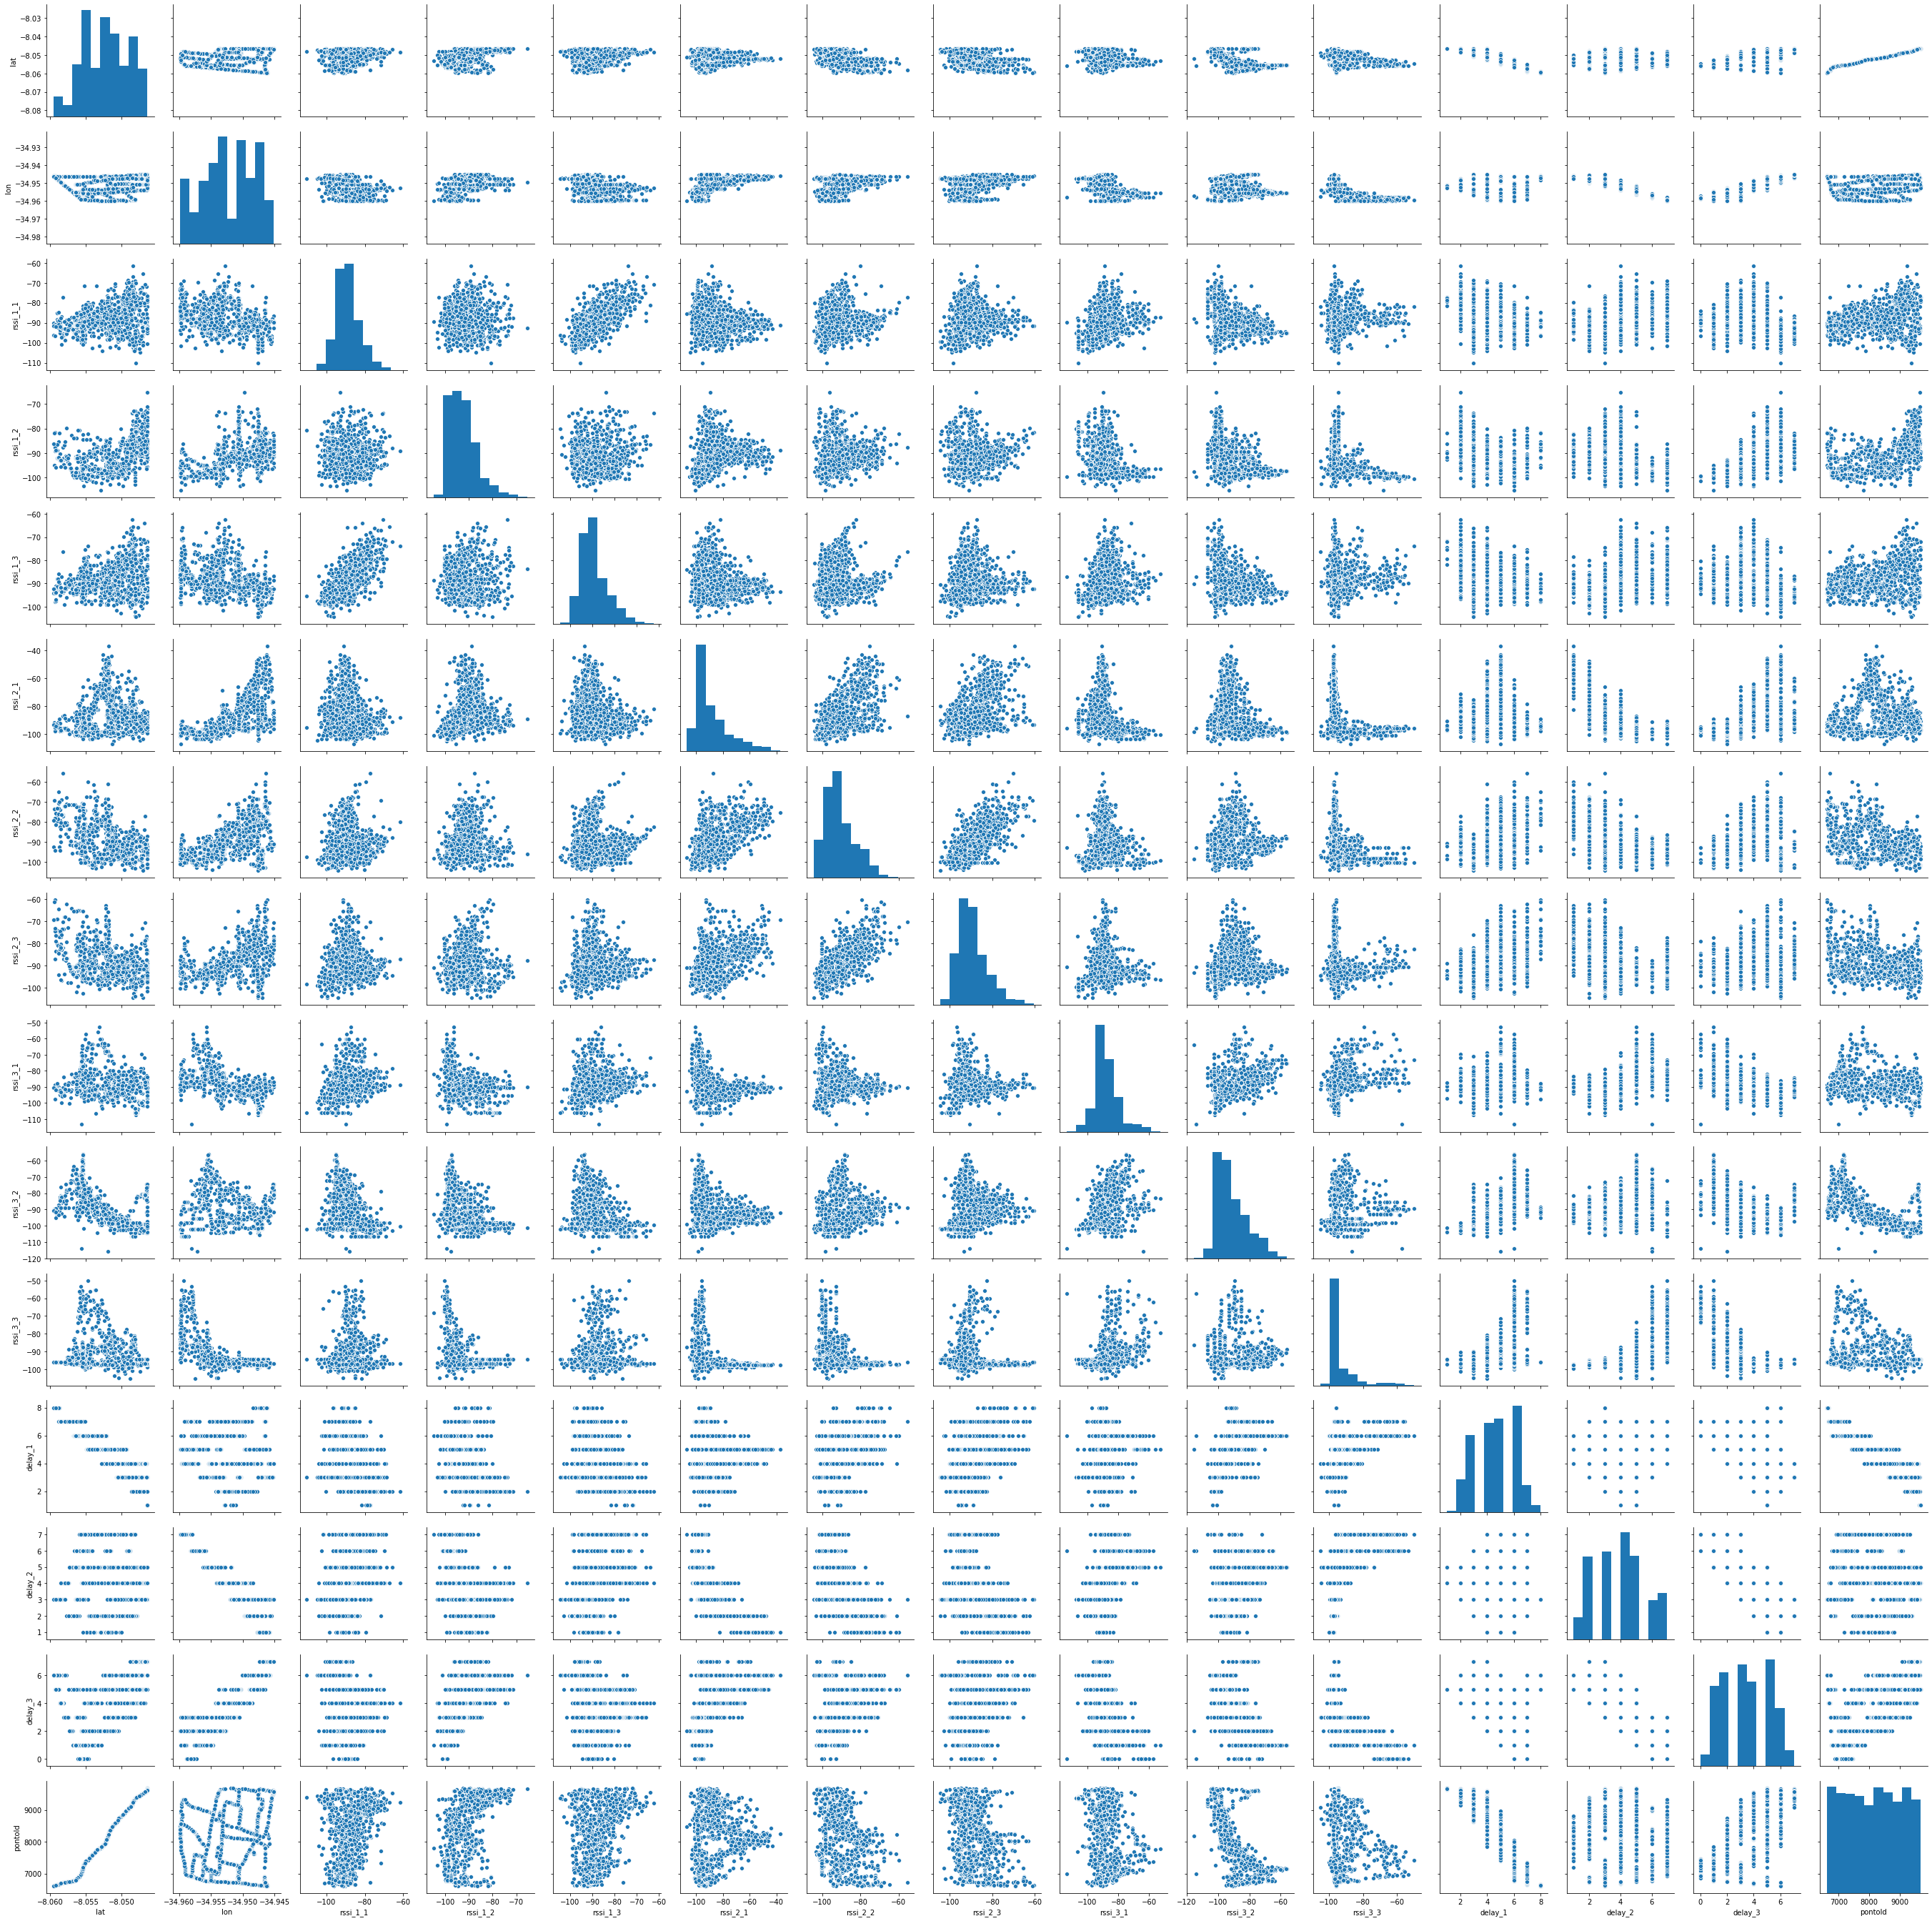

In [41]:
# visualização das variáveis par a par
sns.pairplot(db)